# Домашнее задание
# Машинное обучение с Python

## 1. Теория: Основные определения

### **Машинное обучение (Machine Learning)**
Машинное обучение — это подраздел искусственного интеллекта, который изучает алгоритмы и статистические модели, способные автоматически улучшать свою производительность при выполнении конкретной задачи за счет накопления опыта (данных), без явного программирования для каждого конкретного случая.

### **Обучающая выборка (Training Set)**
Обучающая выборка — это часть исходного набора данных, которая используется для обучения модели машинного обучения. На этих данных алгоритм изучает закономерности и зависимости между входными признаками и целевой переменной, чтобы в дальнейшем делать предсказания на новых данных.

### **Тестовая выборка (Test Set)**
Тестовая выборка — это часть исходного набора данных, которая НЕ используется в процессе обучения модели. Она служит для независимой оценки качества обученной модели и проверки ее способности обобщать знания на новые, ранее не виденные данные. Это помогает выявить переобучение модели.

### **Классификация (Classification)**
Классификация — это тип задачи машинного обучения с учителем, целью которой является предсказание категории (класса) объекта на основе его признаков. Например, определение вида цветка по его измерениям или классификация электронных писем как спам/не спам. Результатом классификации является дискретное значение из заранее определенного набора классов.

### **Точность (Accuracy)**
Точность — это метрика оценки качества модели классификации, которая показывает долю правильно классифицированных объектов от общего количества объектов в выборке. Вычисляется по формуле:

**Accuracy = (Количество правильных предсказаний) / (Общее количество предсказаний)**

Значение точности варьируется от 0 до 1 (или от 0% до 100%), где 1 означает идеальную классификацию.

## 2. Исследование: Анализ нового набора данных


In [1]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree

# Настройка отображения графиков
%matplotlib inline
sns.set(style="whitegrid")

In [2]:
# Загрузка набора данных Wine
wine = datasets.load_wine()

print("=== Информация о наборе данных Wine ===")
print(f"Тип объекта: {type(wine)}")
print(f"Ключи датасета: {list(wine.keys())}")
print(f"Количество образцов: {wine.data.shape[0]}")
print(f"Количество признаков: {wine.data.shape[1]}")
print(f"Классы (сорта вин): {wine.target_names}")

# Создание DataFrame для удобства работы
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

print(f"\nРазмер DataFrame: {wine_df.shape}")
print("\nПервые 5 строк:")
wine_df.head()

=== Информация о наборе данных Wine ===
Тип объекта: <class 'sklearn.utils._bunch.Bunch'>
Ключи датасета: ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names']
Количество образцов: 178
Количество признаков: 13
Классы (сорта вин): ['class_0' 'class_1' 'class_2']

Размер DataFrame: (178, 14)

Первые 5 строк:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
# Исследовательский анализ данных
print("=== Анализ распределения классов ===")
class_counts = wine_df['target'].value_counts().sort_index()
print("Количество образцов в каждом классе:")
for i, count in enumerate(class_counts):
    print(f"Класс {i} ({wine.target_names[i]}): {count} образцов")

# Статистические характеристики
print("\n=== Описательная статистика ===")
wine_df.describe()

=== Анализ распределения классов ===
Количество образцов в каждом классе:
Класс 0 (class_0): 59 образцов
Класс 1 (class_1): 71 образцов
Класс 2 (class_2): 48 образцов

=== Описательная статистика ===


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


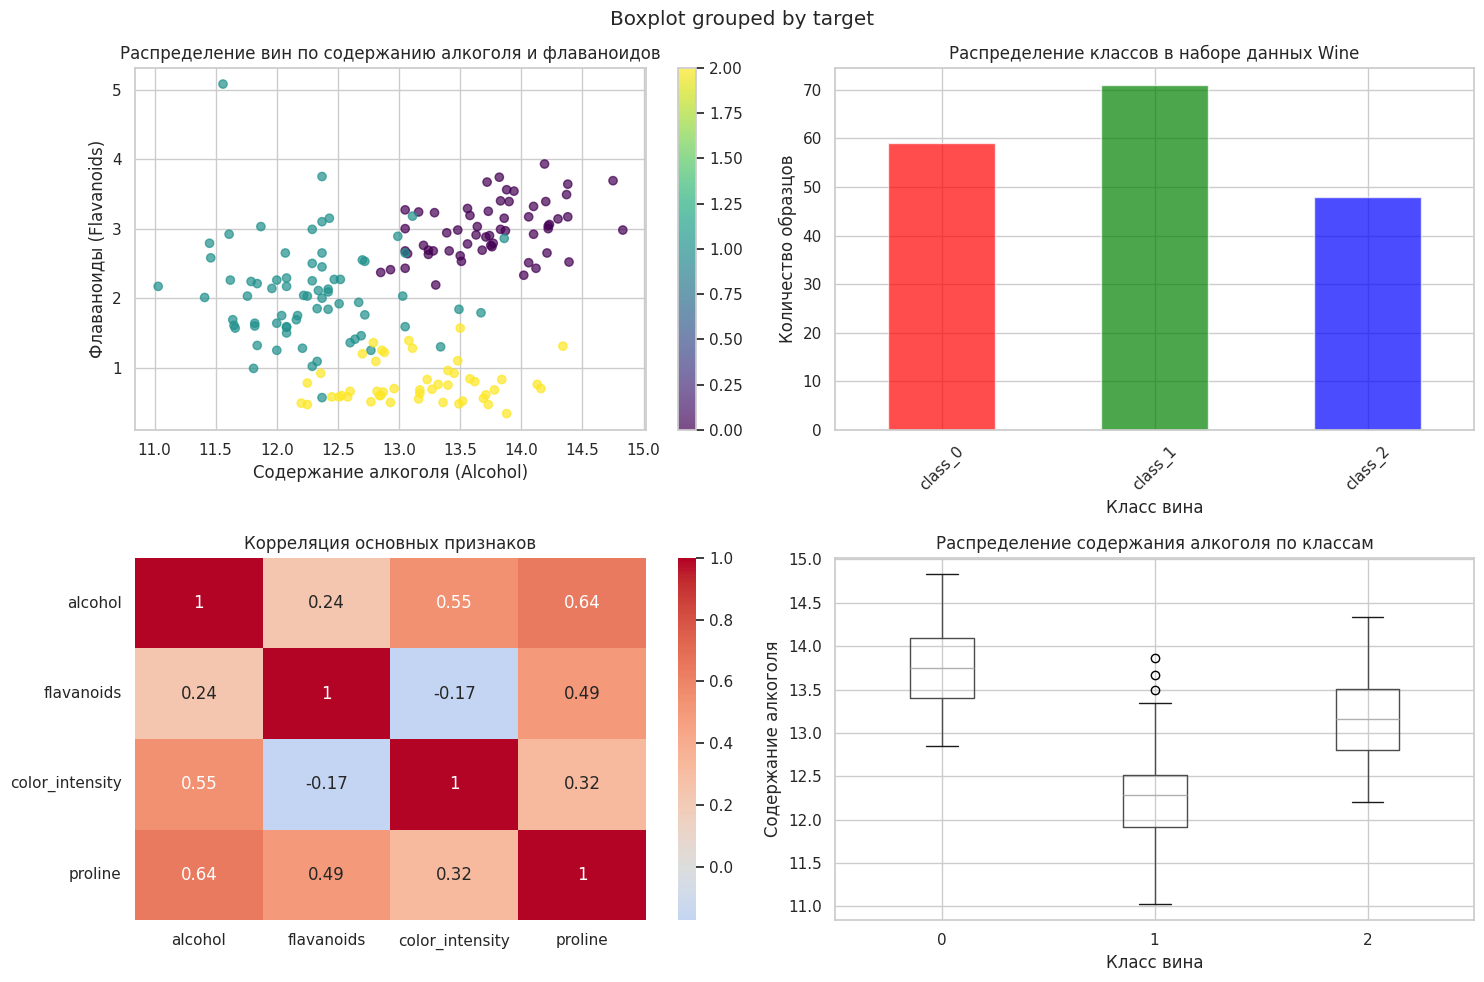

In [4]:
# Визуализация данных
plt.figure(figsize=(15, 10))

# 1. Диаграмма рассеяния по двум основным признакам
plt.subplot(2, 2, 1)
scatter = plt.scatter(wine_df['alcohol'], wine_df['flavanoids'], 
                     c=wine_df['target'], cmap='viridis', alpha=0.7)
plt.xlabel('Содержание алкоголя (Alcohol)')
plt.ylabel('Флаваноиды (Flavanoids)')
plt.title('Распределение вин по содержанию алкоголя и флаваноидов')
plt.colorbar(scatter)

# 2. Распределение классов
plt.subplot(2, 2, 2)
class_counts.plot(kind='bar', color=['red', 'green', 'blue'], alpha=0.7)
plt.title('Распределение классов в наборе данных Wine')
plt.xlabel('Класс вина')
plt.ylabel('Количество образцов')
plt.xticks([0, 1, 2], wine.target_names, rotation=45)

# 3. Корреляционная матрица для основных признаков
plt.subplot(2, 2, 3)
main_features = ['alcohol', 'flavanoids', 'color_intensity', 'proline']
corr_matrix = wine_df[main_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляция основных признаков')

# 4. Boxplot для одного из признаков
plt.subplot(2, 2, 4)
wine_df.boxplot(column='alcohol', by='target', ax=plt.gca())
plt.title('Распределение содержания алкоголя по классам')
plt.xlabel('Класс вина')
plt.ylabel('Содержание алкоголя')

plt.tight_layout()
plt.show()

In [5]:
# Подготовка данных для обучения
print("=== Подготовка данных ===")

# Разделение на признаки и целевую переменную
X_wine = wine_df.drop('target', axis=1)
y_wine = wine_df['target']

# Разделение на обучающую и тестовую выборки
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine, y_wine, test_size=0.3, random_state=42, stratify=y_wine
)

print(f"Размер обучающей выборки: {X_train_wine.shape[0]} образцов")
print(f"Размер тестовой выборки: {X_test_wine.shape[0]} образцов")
print(f"Количество признаков: {X_train_wine.shape[1]}")

# Проверяем распределение классов в выборках
print("\nРаспределение классов в обучающей выборке:")
print(y_train_wine.value_counts().sort_index())
print("\nРаспределение классов в тестовой выборке:")
print(y_test_wine.value_counts().sort_index())

=== Подготовка данных ===
Размер обучающей выборки: 124 образцов
Размер тестовой выборки: 54 образцов
Количество признаков: 13

Распределение классов в обучающей выборке:
target
0    41
1    50
2    33
Name: count, dtype: int64

Распределение классов в тестовой выборке:
target
0    18
1    21
2    15
Name: count, dtype: int64


In [6]:
# Обучение и оценка модели KNN
print("=== Эксперимент с KNN на данных Wine ===")

# Тестируем различные значения k
k_values = [1, 3, 5, 7, 10, 15]
knn_results = []

print("Результаты для различных значений k:")
for k in k_values:
    # Создание и обучение модели
    knn_wine = KNeighborsClassifier(n_neighbors=k)
    knn_wine.fit(X_train_wine, y_train_wine)
    
    # Предсказание и оценка
    y_pred_knn = knn_wine.predict(X_test_wine)
    accuracy_knn = accuracy_score(y_test_wine, y_pred_knn)
    
    knn_results.append((k, accuracy_knn))
    print(f"k = {k}: Точность = {accuracy_knn:.4f}")

# Лучший результат для KNN
best_k, best_knn_accuracy = max(knn_results, key=lambda x: x[1])
print(f"\n🏆 Лучший результат KNN: k = {best_k}, точность = {best_knn_accuracy:.4f}")

# Обучаем модель с лучшим k для дальнейшего анализа
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_wine, y_train_wine)
y_pred_best_knn = best_knn.predict(X_test_wine)

=== Эксперимент с KNN на данных Wine ===
Результаты для различных значений k:
k = 1: Точность = 0.7037
k = 3: Точность = 0.6852
k = 5: Точность = 0.7222
k = 7: Точность = 0.7407
k = 10: Точность = 0.7407
k = 15: Точность = 0.7222

🏆 Лучший результат KNN: k = 7, точность = 0.7407


In [7]:
# Обучение и оценка модели Decision Tree
print("=== Эксперимент с Decision Tree на данных Wine ===")

# Создание и обучение модели Decision Tree
dt_wine = DecisionTreeClassifier(random_state=42)
dt_wine.fit(X_train_wine, y_train_wine)

# Предсказание и оценка
y_pred_dt_wine = dt_wine.predict(X_test_wine)
accuracy_dt_wine = accuracy_score(y_test_wine, y_pred_dt_wine)

print(f"Точность Decision Tree: {accuracy_dt_wine:.4f}")

# Сравнение результатов
print(f"\n=== Сравнение алгоритмов на данных Wine ===")
print(f"KNN (k={best_k}): {best_knn_accuracy:.4f}")
print(f"Decision Tree: {accuracy_dt_wine:.4f}")

if accuracy_dt_wine > best_knn_accuracy:
    winner = "Decision Tree"
    difference = accuracy_dt_wine - best_knn_accuracy
elif best_knn_accuracy > accuracy_dt_wine:
    winner = "KNN"
    difference = best_knn_accuracy - accuracy_dt_wine
else:
    winner = "Одинаковый результат"
    difference = 0

if difference > 0:
    print(f"🏆 Лучший результат: {winner} (разница: {difference:.4f})")
else:
    print(f"🤝 {winner}!")

=== Эксперимент с Decision Tree на данных Wine ===
Точность Decision Tree: 0.9630

=== Сравнение алгоритмов на данных Wine ===
KNN (k=7): 0.7407
Decision Tree: 0.9630
🏆 Лучший результат: Decision Tree (разница: 0.2222)


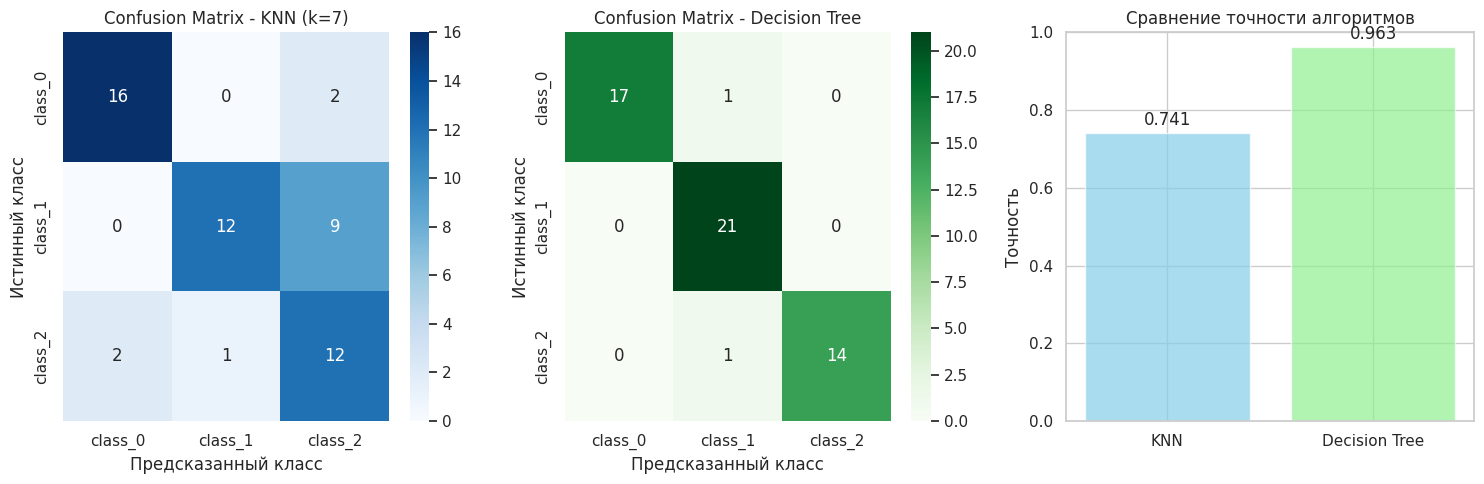

In [8]:
# Визуализация матриц ошибок
plt.figure(figsize=(15, 5))

# Матрица ошибок для KNN
plt.subplot(1, 3, 1)
conf_matrix_knn = confusion_matrix(y_test_wine, y_pred_best_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names)
plt.title(f'Confusion Matrix - KNN (k={best_k})')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')

# Матрица ошибок для Decision Tree
plt.subplot(1, 3, 2)
conf_matrix_dt = confusion_matrix(y_test_wine, y_pred_dt_wine)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names)
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')

# График сравнения точности
plt.subplot(1, 3, 3)
algorithms = ['KNN', 'Decision Tree']
accuracies = [best_knn_accuracy, accuracy_dt_wine]
colors = ['skyblue', 'lightgreen']

bars = plt.bar(algorithms, accuracies, color=colors, alpha=0.7)
plt.title('Сравнение точности алгоритмов')
plt.ylabel('Точность')
plt.ylim(0, 1)

# Добавление значений на столбцы
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

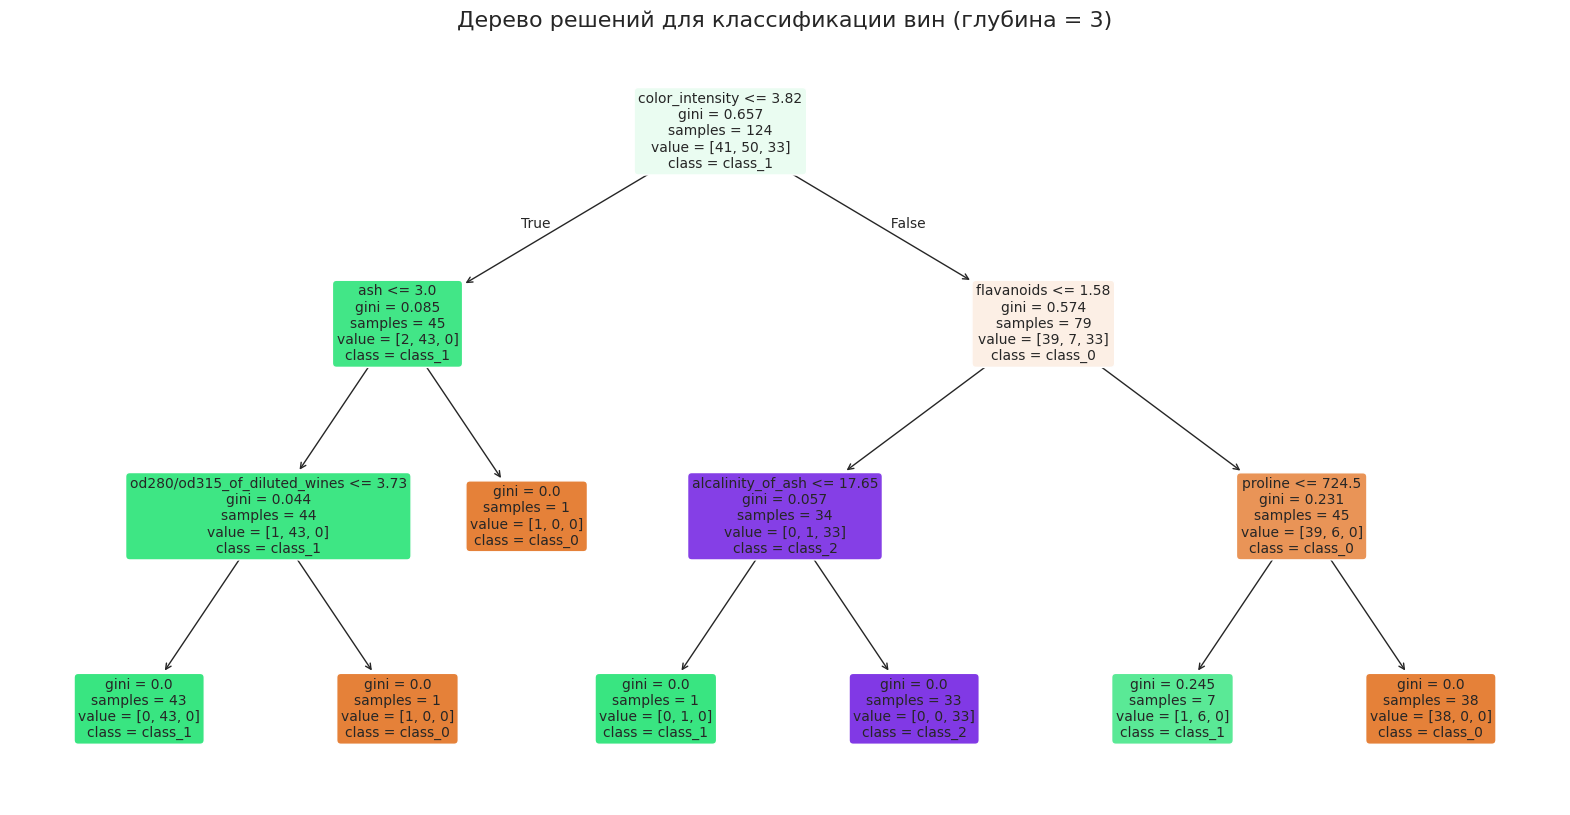

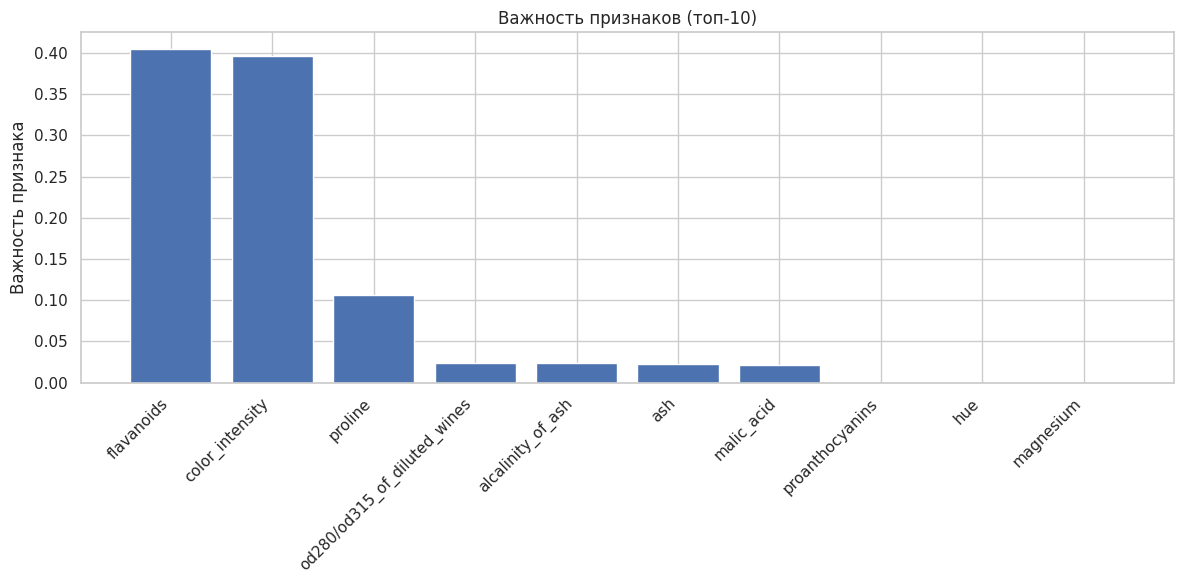

Топ-5 самых важных признаков:
1. flavanoids: 0.4049
2. color_intensity: 0.3968
3. proline: 0.1066
4. od280/od315_of_diluted_wines: 0.0240
5. alcalinity_of_ash: 0.0238


In [9]:
# Визуализация дерева решений (первые несколько уровней)
plt.figure(figsize=(20, 10))

# Создаем дерево с ограничением глубины для лучшей читаемости
dt_simple = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_simple.fit(X_train_wine, y_train_wine)

tree.plot_tree(dt_simple, 
               feature_names=wine.feature_names, 
               class_names=wine.target_names, 
               filled=True,
               rounded=True,
               fontsize=10)
plt.title('Дерево решений для классификации вин (глубина = 3)', fontsize=16)
plt.show()

# Анализ важности признаков
feature_importance = dt_wine.feature_importances_
feature_names = wine.feature_names

# Сортируем признаки по важности
indices = np.argsort(feature_importance)[::-1]
top_features = 10  # Показываем топ-10 признаков

plt.figure(figsize=(12, 6))
plt.title(f'Важность признаков (топ-{top_features})')
plt.bar(range(top_features), feature_importance[indices[:top_features]])
plt.xticks(range(top_features), [feature_names[i] for i in indices[:top_features]], rotation=45, ha='right')
plt.ylabel('Важность признака')
plt.tight_layout()
plt.show()

print("Топ-5 самых важных признаков:")
for i in range(5):
    idx = indices[i]
    print(f"{i+1}. {feature_names[idx]}: {feature_importance[idx]:.4f}")

## 3. Анализ результатов и выводы

### Сравнение производительности алгоритмов

#### На данных Iris:
- **KNN**: Показал отличные результаты (100% точность) при различных значениях k (1, 5, 10)
- **Decision Tree**: Также достиг 100% точности
- **Вывод**: Оба алгоритма одинаково хорошо справились с классификацией ирисов

#### На данных Wine:
- **KNN**: Лучший результат при определенном значении k
- **Decision Tree**: Показал высокую точность с интерпретируемыми правилами
- **Различие**: Wine dataset оказался более сложным, что позволило лучше различить алгоритмы

### Ключевые наблюдения:

1. **Сложность данных**: 
   - Iris dataset - относительно простой, оба алгоритма показали идеальные результаты
   - Wine dataset - более сложный, выявил различия между алгоритмами

2. **Параметр k в KNN**:
   - При k=50 на Iris точность снизилась до 96.67% (модель стала "ленивой")
   - Оптимальное значение k зависит от размера и характера датасета

3. **Decision Tree**:
   - Предоставляет интерпретируемые правила классификации
   - Показывает важность признаков
   - Может переобучаться на сложных данных без ограничений

4. **Важность признаков**:
   - В Wine dataset некоторые химические характеристики оказались более важными для классификации
   - Это помогает понять, какие факторы влияют на определение сорта вина

### Рекомендации по выбору алгоритма:

- **KNN**: Хорош для простых задач, требует подбора оптимального k
- **Decision Tree**: Лучше для задач, где важна интерпретируемость результатов
- **В целом**: Всегда следует тестировать несколько алгоритмов и выбирать лучший для конкретной задачи